In [19]:
from pyopenms import *
import pandas as pd
import numpy as np
import os
import glob

input_mzml_files = glob.glob('results/interim/*.mzML')

raw_data=[]
for filename in input_mzml_files:
    exp= MSExperiment()
    MzMLFile().load(filename, exp)
    exp.sortSpectra(True)
    raw_data.append(exp)

ref_index = [i[0] for i in sorted(enumerate([exp.size() for exp in raw_data]), key=lambda x:x[1])][-1]
aligner = MapAlignmentAlgorithmPoseClustering()
aligner_par= aligner.getDefaults()
#aligner_par.setValue("max_num_peaks_considered", -1)
aligner.setParameters(aligner_par)
aligner.setReference(raw_data[ref_index])

for exp in raw_data[:ref_index] + raw_data[ref_index+1:]:
    trafo = TransformationDescription()
    aligner.align(exp, trafo)
    transformer = MapAlignmentTransformer()
    transformer.transformRetentionTimes(exp, trafo, True)

for exp in raw_data:    
    mzml_file = os.path.join("results", "", "FFMI", "", "interim", "", 'MapAligned_' + os.path.basename(exp.getLoadedFilePath())[19:-5] +".mzML")
    MzMLFile().store(mzml_file, exp)

In [20]:
from pyopenms import *
import pandas as pd
import numpy as np
import os
import glob
import csv
# read tsv file and create list of FeatureFinderMetaboIdentCompound
def metaboTableFromFile(path_to_library_file):
    metaboTable = []
    with open(path_to_library_file, 'r') as tsv_file:
        tsv_reader = csv.reader(tsv_file, delimiter="\t")
        next(tsv_reader) # skip header
        for row in tsv_reader:
            metaboTable.append(FeatureFinderMetaboIdentCompound(
                row[0], # name
                row[1], # sum formula
                float(row[2]), # mass
                [int(charge) for charge in row[3].split(',')], # charges
                [float(rt) for rt in row[4].split(',')], # RTs
                [float(rt_range) for rt_range in row[5].split(',')], # RT ranges
                [float(iso_distrib) for iso_distrib in row[6].split(',')] # isotope distributions
            ))
    return metaboTable

In [11]:
input_mzml_files=glob.glob("results/consensus/interim/*.mzML")
# load ms data from mzML file into MSExperiment
for mzml_file in input_mzml_files:
    spectra = MSExperiment()
    MzMLFile().load(mzml_file, spectra)

    # create FeatureFinderAlgorithmMetaboIdent and assign ms data
    ff = FeatureFinderAlgorithmMetaboIdent()
    ff.setMSData(spectra)

    # read library generate a metabo table with compounds
    metabo_table = metaboTableFromFile('MetaboliteIdentification.tsv')

    # FeatureMap to store results
    fm = FeatureMap()

    # edit some parameters
    params = ff.getParameters()
    params[b'extract:mz_window'] = 5.0 
    #params[b'model:type']= b'asymmetric'
    #params[b'extract:rt_window'] = 10.0
    params[b'detect:peak_width'] = 30.0  #adjust for wide peaks
    ff.setParameters(params)

    # run the FeatureFinderMetaboIdent with the metabo_table and store results in fm
    ff.run(metabo_table, fm)

    # save FeatureMap to file
    ff_file = os.path.join("results", "", "FFMI", "", "interim", "", 'FFMI_' + os.path.basename(mzml_file)[11:-5] +".featureXML")
    FeatureXMLFile().store(ff_file, fm)

RT window size calculated as 240 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 566.277276466771013.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770

RT window size calculated as 120 seconds.
Extracting chromatograms...
Detecting chromatographic peaks...
Found 15 feature candidates in total.
7 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 2 successes, 5 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 0.882216, Intercept: 2.37058
RT window size calculated as 240 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570994.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 198.12063130457102.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 797.417276466771.

RT window size calculated as 120 seconds.
Extracting chromatograms...
Detecting chromatographic peaks...
Found 20 feature candidates in total.
10 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 1 successes, 9 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1, Intercept: 0.424955
RT window size calculated as 240 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 566.277276466771013.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

RT window size calculated as 120 seconds.
Extracting chromatograms...
Detecting chromatographic peaks...
Found 13 feature candidates in total.
9 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 5 successes, 4 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.0439, Intercept: -0.0726849
RT window size calculated as 240 seconds.
RT window size calculated as 120 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570994.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 198.12063130457102.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 797.417276466771.

Extracting chromatograms...
Detecting chromatographic peaks...
Found 17 feature candidates in total.
9 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 3 successes, 6 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 0.736392, Intercept: 5.02004
RT window size calculated as 240 seconds.
RT window size calculated as 120 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570994.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 198.120631304571

Extracting chromatograms...
Detecting chromatographic peaks...
Found 12 feature candidates in total.
8 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 5 successes, 3 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 0.949774, Intercept: 1.61247
RT window size calculated as 240 seconds.


55.077276466770996.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570994.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z t

RT window size calculated as 120 seconds.
Extracting chromatograms...
Detecting chromatographic peaks...
Found 15 feature candidates in total.
10 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 5 successes, 5 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.21575, Intercept: -3.24684
RT window size calculated as 240 seconds.
RT window size calculated as 120 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570994.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 198.12063130457102.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 797.417276466771.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 798.420631304570975.

Extracting chromatograms...
Detecting chromatographic peaks...
Found 17 feature candidates in total.
10 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 3 successes, 7 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.02929, Intercept: -0.143836
RT window size calculated as 240 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

RT window size calculated as 120 seconds.
Extracting chromatograms...
Detecting chromatographic peaks...
Found 15 feature candidates in total.
9 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 2 successes, 7 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 0.819524, Intercept: 2.19871
RT window size calculated as 240 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 566.277276466771013.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

RT window size calculated as 120 seconds.
Extracting chromatograms...
Detecting chromatographic peaks...
Found 12 feature candidates in total.
10 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 3 successes, 7 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.04698, Intercept: -0.391067
RT window size calculated as 240 seconds.
RT window size calculated as 120 seconds.



Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.18063130457

Extracting chromatograms...
Detecting chromatographic peaks...
Found 12 feature candidates in total.
7 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 2 successes, 5 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.12263, Intercept: -0.240247
RT window size calculated as 240 seconds.
RT window size calculated as 120 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

Extracting chromatograms...
Detecting chromatographic peaks...
Found 13 feature candidates in total.
7 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 3 successes, 4 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.25824, Intercept: -3.64038
RT window size calculated as 240 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

RT window size calculated as 120 seconds.
Extracting chromatograms...
Detecting chromatographic peaks...
Found 22 feature candidates in total.
9 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 3 successes, 6 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: -1.02426, Intercept: 26.0007


In [12]:
from collections import defaultdict
from functools import reduce
from pathlib import Path
from time import perf_counter
import sys

from IPython.core.display import display
from pandas import CategoricalDtype
import numpy as np
from pyopenms import *
import pandas as pd
import os

common_meta_value_types = {
    b'label': 'U30',
    b'spectrum_index': 'i',
    b'score_fit': 'f',
    b'score_correlation': 'f',
    b'FWHM': 'f',
    b'spectrum_native_id': 'U30',
    b"num_of_masstraces" : "f"
}

class FeatureMapDF(FeatureMap):
    def __init__(self):
        super().__init__()
    
    # meta_values = None (default), 'all' or list of meta value names
    def get_df(self, meta_values = None):
        # get all possible meta value keys in a set
        if meta_values == 'all':
            meta_values = set()
            for f in self:
                mvs = []
                f.getKeys(mvs)
                for m in mvs:
                    meta_values.add(m)
        elif not meta_values: # if None, set to empty list
            meta_values = []
        
        def gen(fmap: FeatureMap, fun):
            for f in fmap:
                yield from fun(f, meta_values)

        def extract_meta_data(f: Feature, meta_values):
            pep = f.getPeptideIdentifications()  # type: list[PeptideIdentification]
            bb = f.getConvexHull().getBoundingBox2D()
                
            vals = [f.getMetaValue(m) if f.metaValueExists(m) else np.NA for m in meta_values]   # find some NA or None value for numpy
            
            if len(pep) != 0:
                hits = pep[0].getHits()

                if len(hits) != 0:
                    besthit = hits[0]  # type: PeptideHit
                    yield f.getUniqueId(), besthit.getSequence().toString(), f.getCharge(), f.getRT(), f.getMZ(), bb[0][0], bb[1][0], f.getMetaValue("PeptideRef"), f.getOverallQuality(), f.getIntensity()
                else:
                    yield f.getUniqueId(), None, f.getCharge(), f.getRT(), f.getMZ(), bb[0][0], bb[1][0], f.getMetaValue("PeptideRef"), f.getOverallQuality(), f.getIntensity()
            else:
                yield f.getUniqueId(), None, f.getCharge(), f.getRT(), f.getMZ(), bb[0][0], bb[1][0], f.getMetaValue("PeptideRef"), f.getOverallQuality(), f.getIntensity()

        cnt = self.size()

        mddtypes = [('id', np.dtype('uint64')), ('sequence', 'U200'), ('charge', 'i4'), ('RT', 'f'), ('mz', 'f'),
                    ('RTstart', 'f'), ('RTend', 'f'), ("PeptideRef", 'U200'),
                    ('quality', 'f'), ('intensity', 'f')]
        
        for meta_value in meta_values:
            if meta_value in common_meta_value_types:
                mddtypes.append((meta_value.decode(), common_meta_value_types[meta_value]))
            else:
                mddtypes.append((meta_value.decode(), 'U50'))
        mdarr = np.fromiter(iter=gen(self, extract_meta_data), dtype=mddtypes, count=cnt)
        df= pd.DataFrame(mdarr).set_index('id').sort_values("mz").drop(columns= "sequence")
        return df

In [18]:
input_feature_files = glob.glob('results/FFMI/interim/*.featureXML')

for filename in input_feature_files:
    fmap = FeatureMapDF()
    FeatureXMLFile().load(filename, fmap)
    DF= fmap.get_df()
    feature_csv= os.path.join("results", "", "FFMI", "", 'features_' + os.path.basename(filename)[:-10] +"csv")
    DF.to_csv(feature_csv)
    print(os.path.basename(filename))
    display(DF)
    #reduce RT window (way lower window if process) + peak width
    #quality : ask oliver alka/ 
    #process all raw data with Alignement etc - do not overwrite them
    #plot them to see the quality of peaks

FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_rep3.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
9146234678057067423,1,84.136314,139.087280,73.346336,95.110229,pyracrimycinA_m138.080002_z1_rt50.82,-30.650612,8.514860e+03
1712977113928082246,1,74.853256,155.077271,56.357735,86.239685,pyracrimycinB_m154.070007_z1_rt69.540001,-2.965184,5.487601e+05
1283199673547721902,1,67.588593,197.117279,61.899235,71.302681,GermicidinA_m196.110001_z1_rt52.169998,-14.471313,1.102952e+04
2938956168882226909,1,369.203064,585.357300,347.044525,382.371826,dehydroxynocardamine_m584.349976_z1_rt351.070007,-1.617854,1.175028e+06
11572011862011281516,2,390.612061,712.417297,372.236145,415.608948,epemicinB_m1422.819946_z2_rt405.769989,-8.398730,1.009633e+08
13612056870597448437,2,385.285065,793.447266,373.762909,389.289520,epemicinA_m1584.880005_z2_rt386.850006,1.289641,2.720124e+08
5018284383888146049,1,415.875061,1423.827271,400.955475,427.949158,epemicinB_m1422.819946_z1_rt405.769989,-12.396987,2.018271e+06


FFMI_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_rep3.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
8808833674169380678,1,75.659187,139.087280,64.943298,86.367104,pyracrimycinA_m138.080002_z1_rt50.82,-32.769218,9.321837e+02
17590512748564471723,1,75.663795,155.077271,57.845642,87.269516,pyracrimycinB_m154.070007_z1_rt69.540001,-47.435841,7.577838e+04
9819217110326066904,1,96.123833,197.117279,75.819672,110.530533,GermicidinA_m196.110001_z1_rt52.169998,-56.288284,1.063164e+05
13064271819176104547,1,83.893051,402.207275,71.405190,95.714088,bioxalomycina2_m401.200012_z1_rt48.18,-39.552944,9.700552e+02
5297803445239421167,1,251.207047,566.277283,242.226044,260.206787,Coelichelin_m565.27002_z1_rt268.049988,-29.022409,3.645466e+02
11467056682390839260,1,375.271393,585.357300,364.508575,385.828674,dehydroxynocardamine_m584.349976_z1_rt351.070007,-32.179302,1.131021e+03
9443375806303394225,1,334.993744,601.357300,323.848999,346.051208,desferrioxamineE_m600.349976_z1_rt329.5,-31.506321,1.598458e+03
5023906417736834530,2,404.968628,712.417297,392.737823,417.482239,epemicinB_m1422.819946_z2_rt405.769989,-4.650047,4.299625e+07
11562764834915274349,2,401.994263,793.447266,380.229309,416.805969,epemicinA_m1584.880005_z2_rt386.850006,-0.364333,3.079595e+07


FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_blank.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
4252393973145171902,1,96.395790,139.087280,86.067261,107.102402,pyracrimycinA_m138.080002_z1_rt50.82,-29.529842,7120.071289
598515360344458732,1,75.043365,155.077271,66.252449,84.041595,pyracrimycinB_m154.070007_z1_rt69.540001,-4.723840,16379.950195
15599967794666256068,1,55.876884,197.117279,51.406246,60.287327,GermicidinA_m196.110001_z1_rt52.169998,-14.950515,2560.256104
5431128617931708758,1,97.863182,402.207275,87.925728,108.138756,bioxalomycina2_m401.200012_z1_rt48.18,-31.258005,3407.419922
12564038333350442816,1,279.031219,566.277283,268.621857,286.554260,Coelichelin_m565.27002_z1_rt268.049988,-28.021040,17261.109375
4835898834943818114,1,401.751129,585.357300,382.656586,410.980804,dehydroxynocardamine_m584.349976_z1_rt351.070007,-45.492367,69738.562500
5015492502310232374,1,365.089996,587.337280,352.634247,377.223236,desmethylenylnocardamine_m586.330017_z1_rt339....,-41.334141,13700.570312
6932548329448112406,1,342.617035,601.357300,334.154938,345.665466,desferrioxamineE_m600.349976_z1_rt329.5,-17.936518,14537.969727
17107038892595432463,2,415.031372,712.417297,403.652649,426.369934,epemicinB_m1422.819946_z2_rt405.769989,-1.427928,29454.740234


FFMI_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_rep2.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
13911200009851780176,1,74.290092,139.087280,64.328438,84.224373,pyracrimycinA_m138.080002_z1_rt50.82,-26.067657,1.062082e+04
13237212684619731696,1,65.570366,155.077271,54.546131,70.552925,pyracrimycinB_m154.070007_z1_rt69.540001,-26.426058,9.785487e+03
2559546519911667843,1,84.708687,197.117279,78.054146,91.662827,GermicidinA_m196.110001_z1_rt52.169998,-21.427013,1.954153e+04
3263577303515150555,1,290.996063,566.277283,279.578583,302.336090,Coelichelin_m565.27002_z1_rt268.049988,-29.727249,4.541466e+04
15209845293147416315,1,364.554932,601.357300,353.383423,368.396271,desferrioxamineE_m600.349976_z1_rt329.5,-24.196650,3.662425e+04
4145281427652798781,2,405.403503,712.417297,390.664398,417.472778,epemicinB_m1422.819946_z2_rt405.769989,-1.702287,4.577306e+08
1510038737802161302,2,402.183716,793.447266,379.437805,416.111053,epemicinA_m1584.880005_z2_rt386.850006,-12.974024,2.565834e+09
8138270044592363596,1,405.445465,1423.827271,384.016663,417.635406,epemicinB_m1422.819946_z1_rt405.769989,1.176750,5.821453e+07


FFMI_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_rep1.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
3954629588808248551,1,91.924515,139.087280,81.804665,101.935471,pyracrimycinA_m138.080002_z1_rt50.82,-28.493702,3.597652e+03
17579449441137643914,1,75.889290,155.077271,61.737713,87.915283,pyracrimycinB_m154.070007_z1_rt69.540001,-4.288610,5.910963e+05
17518489173095815967,1,83.209991,197.117279,76.932404,89.728249,GermicidinA_m196.110001_z1_rt52.169998,-20.209766,2.089679e+04
8411335122936435185,1,92.553482,402.207275,82.417511,102.801552,bioxalomycina2_m401.200012_z1_rt48.18,-29.780893,2.555978e+03
11494838702626588583,1,303.701630,566.277283,293.802643,313.499329,Coelichelin_m565.27002_z1_rt268.049988,-28.391918,3.044381e+03
9015260834971062473,1,394.815857,585.357300,384.658630,405.048645,dehydroxynocardamine_m584.349976_z1_rt351.070007,-30.915171,2.640325e+03
1704613174532360723,1,295.364380,587.337280,284.398132,306.229370,desmethylenylnocardamine_m586.330017_z1_rt339....,-33.099403,5.008255e+03
7779554147690331471,2,405.628540,712.417297,393.979919,417.589020,epemicinB_m1422.819946_z2_rt405.769989,-3.285903,6.167582e+07
11197652553389137008,2,402.023224,793.447266,380.240845,416.989532,epemicinA_m1584.880005_z2_rt386.850006,-0.411033,4.033309e+07


FFMI_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_blank.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
14354325874073067012,1,49.971325,139.087280,44.336926,59.890415,pyracrimycinA_m138.080002_z1_rt50.82,-21.872835,2.766742e+07
16437006399771267456,1,77.009262,155.077271,62.105278,87.951767,pyracrimycinB_m154.070007_z1_rt69.540001,-39.784569,2.909878e+05
3522958239457478829,1,81.196526,197.117279,73.387558,84.528564,GermicidinA_m196.110001_z1_rt52.169998,-17.076439,2.547643e+07
6685631920900072632,1,85.332664,402.207275,73.933372,102.067108,bioxalomycina2_m401.200012_z1_rt48.18,-18.308214,9.587464e+06
12612471957055077684,1,274.214844,566.277283,267.936340,278.923065,Coelichelin_m565.27002_z1_rt268.049988,-17.149879,5.108530e+06
2873767249507815154,1,406.851471,585.357300,387.216400,411.025238,dehydroxynocardamine_m584.349976_z1_rt351.070007,-40.275589,5.725257e+05
15841939912995643107,1,361.204926,587.337280,348.157806,391.119232,desmethylenylnocardamine_m586.330017_z1_rt339....,-67.418022,2.033307e+06
12848881996155254235,1,339.122986,601.357300,323.518433,341.029541,desferrioxamineE_m600.349976_z1_rt329.5,-0.635722,2.806649e+05
6864878434969806415,2,386.056427,793.447266,378.600769,394.616150,epemicinA_m1584.880005_z2_rt386.850006,-26.298832,6.029212e+06


FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_rep1.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
5423268417272655448,1,50.940994,139.087280,45.542580,56.089123,pyracrimycinA_m138.080002_z1_rt50.82,-15.612703,1.892258e+04
16498344288797661301,1,73.867119,155.077271,62.690357,85.243683,pyracrimycinB_m154.070007_z1_rt69.540001,-0.577196,2.003948e+05
12028716009261872556,1,83.123222,197.117279,76.786888,91.004898,GermicidinA_m196.110001_z1_rt52.169998,-22.296476,2.577706e+04
15110561982494878351,1,368.855072,585.357300,346.870850,382.102966,dehydroxynocardamine_m584.349976_z1_rt351.070007,-1.736400,7.303059e+05
8608180337175407225,2,407.356964,712.417297,400.391571,407.792084,epemicinB_m1422.819946_z2_rt405.769989,1.316649,1.411976e+07
15752537146556463390,2,401.475372,793.447266,376.253662,417.282227,epemicinA_m1584.880005_z2_rt386.850006,-17.870573,3.284246e+08
1137669744014512764,1,406.084778,1423.827271,394.896210,408.288635,epemicinB_m1422.819946_z1_rt405.769989,0.743917,1.877565e+06


FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_rep2.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
1220149278209079256,1,74.065834,155.077271,63.038082,85.062027,pyracrimycinB_m154.070007_z1_rt69.540001,3.028834,2.395308e+04
6483405074352155189,1,69.787056,197.117279,65.390083,76.466370,GermicidinA_m196.110001_z1_rt52.169998,-17.601377,2.667839e+03
3340050767759534141,1,369.003754,585.357300,346.871490,381.517548,dehydroxynocardamine_m584.349976_z1_rt351.070007,3.645035,1.501516e+05
2455857366144670,1,345.897705,601.357300,330.202637,358.131134,desferrioxamineE_m600.349976_z1_rt329.5,-45.063755,3.255746e+03
3368061551261441003,2,405.849396,712.417297,397.770294,423.971771,epemicinB_m1422.819946_z2_rt405.769989,-7.372735,7.129881e+07
16741916997634569429,2,383.689606,793.447266,371.708801,389.485962,epemicinA_m1584.880005_z2_rt386.850006,1.287763,1.179903e+08
3357784695889425542,1,406.584198,1423.827271,390.046265,425.553436,epemicinB_m1422.819946_z1_rt405.769989,1.341102,7.261849e+06


FFMI_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_rep2.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
12008143138873470165,1,76.877220,139.087280,65.930222,87.835083,pyracrimycinA_m138.080002_z1_rt50.82,0.378847,1.316386e+04
7458155033839787014,1,74.802620,155.077271,58.921688,87.148109,pyracrimycinB_m154.070007_z1_rt69.540001,-7.052765,4.520036e+05
7740389265735716206,1,61.404102,197.117279,50.311832,72.443947,GermicidinA_m196.110001_z1_rt52.169998,-3.031118,1.614657e+04
14925062965287631396,1,321.123871,566.277283,309.986206,327.997986,Coelichelin_m565.27002_z1_rt268.049988,-30.106461,7.981420e+03
18203594264327217551,1,351.833069,601.357300,340.754059,362.809570,desferrioxamineE_m600.349976_z1_rt329.5,-31.678211,7.977766e+03
15669526749527868611,2,405.159485,712.417297,393.727600,417.507446,epemicinB_m1422.819946_z2_rt405.769989,-7.351804,3.905244e+07
14216176693831685308,2,401.935883,793.447266,380.869354,415.866913,epemicinA_m1584.880005_z2_rt386.850006,-2.039221,4.263105e+07
11907439485821565160,1,130.025726,1255.637329,119.351280,134.974167,actinomycinD_m1254.630005_z1_rt75.089996,-25.923353,3.026718e+03
4736017718171894348,1,405.455322,1423.827271,393.971466,418.002960,epemicinB_m1422.819946_z1_rt405.769989,2.623732,6.544744e+06


FFMI_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_rep1.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
13803581830280842869,1,100.350342,139.087280,90.145836,110.799171,pyracrimycinA_m138.080002_z1_rt50.82,-28.917395,4.373144e+03
15135914576884121901,1,60.063705,155.077271,55.360931,64.547340,pyracrimycinB_m154.070007_z1_rt69.540001,-16.340290,5.367300e+03
8283593086304563640,1,66.704086,197.117279,58.679062,73.202240,GermicidinA_m196.110001_z1_rt52.169998,-22.644262,8.980359e+03
5493430250486962370,1,256.146637,561.357300,246.259354,266.073456,DesferrioxamineB_m560.349976_z1_rt225.770004,-29.351942,3.472484e+03
2587800612010996613,1,290.717590,566.277283,276.592773,299.819305,Coelichelin_m565.27002_z1_rt268.049988,-34.017456,5.851064e+04
14818187030718309506,1,368.694641,585.357300,358.482758,378.958130,dehydroxynocardamine_m584.349976_z1_rt351.070007,-29.622807,3.286004e+03
8013330877091911262,1,344.190186,601.357300,334.215912,348.363281,desferrioxamineE_m600.349976_z1_rt329.5,-22.457724,8.598434e+03
15910351331378191793,2,404.857910,712.417297,391.145691,423.412720,epemicinB_m1422.819946_z2_rt405.769989,-10.379732,3.737016e+07
16107807797907860655,2,401.539062,793.447266,379.261017,418.212860,epemicinA_m1584.880005_z2_rt386.850006,-3.772288,1.061785e+08


FFMI_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_rep3.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
17222747963521560784,1,52.680645,139.087280,44.211697,62.373158,pyracrimycinA_m138.080002_z1_rt50.82,-26.394041,8.759972e+04
336285806003525953,1,55.215122,155.077271,47.586357,62.453922,pyracrimycinB_m154.070007_z1_rt69.540001,-22.620344,9.794956e+04
5984831516312264437,1,70.320396,197.117279,63.246769,77.604492,GermicidinA_m196.110001_z1_rt52.169998,-22.659843,6.551426e+04
3491524930253102039,1,290.183929,566.277283,280.350220,296.563538,Coelichelin_m565.27002_z1_rt268.049988,-22.540548,2.888576e+05
3089774539512543081,1,356.770782,587.337280,346.002838,367.499084,desmethylenylnocardamine_m586.330017_z1_rt339....,-32.730129,7.604877e+04
4061708588346637150,1,344.232147,601.357300,333.666901,348.863739,desferrioxamineE_m600.349976_z1_rt329.5,-23.327187,2.103441e+05
6545910587867074301,2,405.155975,712.417297,393.216125,417.076050,epemicinB_m1422.819946_z2_rt405.769989,-1.792436,8.069644e+07
14571464927863351640,2,388.046112,793.447266,376.440460,388.259460,epemicinA_m1584.880005_z2_rt386.850006,1.291985,2.358882e+07
4115618936026863747,1,405.181580,1423.827271,393.216125,418.031189,epemicinB_m1422.819946_z1_rt405.769989,1.351994,1.826395e+07


FFMI_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_blank.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
3670304783513396299,1,65.905937,139.087280,54.580750,77.285408,pyracrimycinA_m138.080002_z1_rt50.82,-34.627979,13267.089844
12617913100230419962,1,68.249886,155.077271,62.648357,72.748627,pyracrimycinB_m154.070007_z1_rt69.540001,-18.011429,3648.304443
12527682067684237893,1,83.606575,197.117279,75.313599,92.785774,GermicidinA_m196.110001_z1_rt52.169998,-27.513254,8857.994141
16153409462439491468,1,50.441994,402.207275,44.700909,56.421604,bioxalomycina2_m401.200012_z1_rt48.18,-17.816376,10928.269531
13766464088539397952,1,301.694305,566.277283,289.884766,314.810883,Coelichelin_m565.27002_z1_rt268.049988,-32.626316,194571.796875
13449401264287110356,1,395.087433,585.357300,384.754883,405.716003,dehydroxynocardamine_m584.349976_z1_rt351.070007,-31.837902,7704.846680
4544493640358389176,1,340.281586,601.357300,328.901611,351.649323,desferrioxamineE_m600.349976_z1_rt329.5,-25.968336,37420.539062
15775312106864262915,2,407.118774,712.417297,395.421722,423.811523,epemicinB_m1422.819946_z2_rt405.769989,1.113749,74127.828125
1878548276849110448,2,403.934692,793.447266,392.255096,420.540924,epemicinA_m1584.880005_z2_rt386.850006,1.328235,118422.101562


In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

filename = 'results/FFMI/interim/FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_blank.featureXML'

def plotDetectedFeatures3D(path_to_featureXML):
    fm = FeatureMap()
    fh = FeatureXMLFile()
    fh.load(path_to_featureXML, fm)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for feature in fm:
        color = next(ax._get_lines.prop_cycler)['color']
        # chromatogram data is stored in the subordinates of the feature
        for i, sub in enumerate(feature.getSubordinates()):
            retention_times = [x[0] for x in sub.getConvexHulls()[0].getHullPoints()]
            intensities = [int(y[1]) for y in sub.getConvexHulls()[0].getHullPoints()]
            mz = sub.getMetaValue('MZ')
            ax.plot(retention_times, intensities, zs = mz, zdir = 'x', color = color)
            if i == 0:
                ax.text(mz,retention_times[0], max(intensities)*1.02, feature.getMetaValue('label'), color = color)

    ax.set_ylabel('time (s)')
    ax.set_xlabel('m/z')
    ax.set_zlabel('intensity (cps)')
    plt.show()


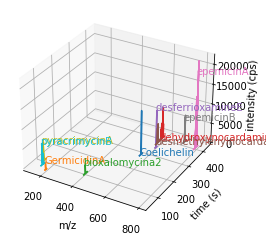

In [17]:
plotDetectedFeatures3D(filename)